# 라이브러리 및 데이터 로드

In [427]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [344]:
df = pd.read_csv('./Dubizzle_used_car_sales.csv')

# 데이터 기본 정보 확인

In [345]:
df.shape

(9970, 20)

In [346]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9970 entries, 0 to 9969
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   title                 9965 non-null   object 
 1   price_in_aed          9970 non-null   int64  
 2   kilometers            9970 non-null   int64  
 3   body_condition        9970 non-null   object 
 4   mechanical_condition  9970 non-null   object 
 5   seller_type           9970 non-null   object 
 6   body_type             9970 non-null   object 
 7   no_of_cylinders       9889 non-null   object 
 8   transmission_type     9970 non-null   object 
 9   regional_specs        9970 non-null   object 
 10  horsepower            9970 non-null   object 
 11  fuel_type             9970 non-null   object 
 12  steering_side         9970 non-null   object 
 13  year                  9000 non-null   float64
 14  color                 9970 non-null   object 
 15  emirate              

In [347]:
df.head(3)

,title,price_in_aed,kilometers,body_condition,mechanical_condition,seller_type,body_type,no_of_cylinders,transmission_type,regional_specs,horsepower,fuel_type,steering_side,year,color,emirate,motors_trim,company,model,date_posted
0,MITSUBISHI PAJERO 3.5L / 2013,26000,167390,Perfect inside and out,Perfect inside and out,Dealer,SUV,6,Automatic Transmission,GCC Specs,Unknown,Gasoline,Left Hand Side,2013.0,Silver,Dubai,GLS,mitsubishi,pajero,13/05/2022
1,chevrolet silverado,110000,39000,Perfect inside and out,Perfect inside and out,Dealer,SUV,8,Automatic Transmission,North American Specs,400 - 500 HP,Gasoline,Left Hand Side,2018.0,White,Sharjah,1500 High Country,chevrolet,silverado,14/01/2022
2,MERCEDES-BENZ E300 - 2014 - GCC SPEC - FULL OP...,78000,200000,Perfect inside and out,Perfect inside and out,Dealer,Sedan,6,Automatic Transmission,GCC Specs,400 - 500 HP,Gasoline,Left Hand Side,2014.0,Blue,Sharjah,E 300,mercedes-benz,e-class,05/05/2022


In [348]:
df[['date_posted','year']]

,date_posted,year
0,13/05/2022,2013.0
1,14/01/2022,2018.0
2,05/05/2022,2014.0
3,30/04/2022,2018.0
4,13/05/2022,2020.0
...,...,...
9965,18/11/2021,2015.0
9966,11/05/2022,2014.0
9967,14/12/2021,NaN
9968,06/03/2022,2013.0


In [349]:
col = df.columns.tolist() # df.columns
col

['title',
 'price_in_aed',
 'kilometers',
 'body_condition',
 'mechanical_condition',
 'seller_type',
 'body_type',
 'no_of_cylinders',
 'transmission_type',
 'regional_specs',
 'horsepower',
 'fuel_type',
 'steering_side',
 'year',
 'color',
 'emirate',
 'motors_trim',
 'company',
 'model',
 'date_posted']

### 각 컬럼 설명

| 컬럼명                   | 설명                                  |
| --------------------- | ----------------------------------- |
| title                 | 매물 게시글의 제목입니다.                      |
| price\_in\_aed        | 아랍에미리트 디르함(AED) 기준 차량 가격입니다.        |
| kilometers            | 차량의 총주행 거리(km)입니다.                  |
| body\_condition       | 차량의 외부 상태를 나타냅니다.                   |
| mechanical\_condition | 엔진, 변속기 등 기계적인 부분의 상태를 나타냅니다.       |
| seller\_type          | 판매자 유형입니다. (예: 딜러, 개인)              |
| body\_type            | 차체 유형입니다. (예: SUV, 세단)              |
| no\_of\_cylinders     | 엔진의 실린더 개수입니다.                      |
| transmission\_type    | 변속기 유형입니다. (예: 자동, 수동)              |
| regional\_specs       | 차량이 제작된 지역 사양입니다. (예: GCC, 북미)      |
| horsepower            | 엔진의 마력 정보입니다.                       |
| fuel\_type            | 사용하는 연료 종류입니다. (예: 가솔린, 디젤, 전기)     |
| steering\_side        | 운전석의 위치입니다. (예: 왼쪽 핸들)              |
| year                  | 차량의 제조 연도입니다.                       |
| color                 | 차량의 색상입니다.                          |
| emirate               | 차량이 판매되는 아랍에미리트 내 토후국 위치입니다.        |
| motors\_trim          | 차량의 세부 트림 또는 등급 정보입니다.              |
| company               | 자동차 제조사입니다. (예: toyota, mitsubishi) |
| model                 | 자동차 모델명입니다.                         |
| date\_posted          | 매물 게시글이 등록된 날짜입니다.                  |


--- 

### 숫자형(수치형) 데이터

| **컬럼명**        | **설명**                | **비고**                  |
| -------------- | --------------------- | ----------------------- |
| price\_in\_aed | 차량 판매 가격              | 연속형 데이터                 |
| kilometers     | 차량 총 주행 거리            | 연속형 데이터                 |
| year           | 제조 연도                 | 이산형 데이터, 결측치 존재, 전처리 필요 |
| horsepower     | 마력 ('400 - 500 HP' 등) | 전처리 후 수치형으로 변환 가능       |


### 범주형 데이터
| **컬럼명**               | **설명**                            | **비고**               |
| --------------------- | --------------------------------- | -------------------- |
| title                 | 게시글 제목: 차량 설명 포함 텍스트              | 고유값 많음, 전처리 필요       |
| body\_condition       | 차량 외부 상태                          | 순서 없는 명목형 데이터        |
| mechanical\_condition | 기계적 상태                            | 순서 없는 명목형 데이터        |
| seller\_type          | 판매자 유형 ('Dealer', 'Owner' 등)      | 순서 없는 명목형 데이터        |
| body\_type            | 차체 유형 ('SUV', 'Sedan' 등)          | 순서 없는 명목형 데이터        |
| no\_of\_cylinders     | 엔진 실린더 개수 ('4', '6', '8' 등)       | 숫자이지만 순서 있는 범주형(순서형) |
| transmission\_type    | 변속기 유형 ('Automatic Transmission') | 순서 없는 명목형 데이터        |
| regional\_specs       | 지역 사양 ('GCC Specs' 등)             | 순서 없는 명목형 데이터        |
| fuel\_type            | 연료 종류 ('Gasoline', 'Diesel' 등)    | 순서 없는 명목형 데이터        |
| steering\_side        | 운전대 위치 ('Left Hand Side' 등)       | 순서 없는 명목형 데이터        |
| color                 | 차량 색상                             | 순서 없는 명목형 데이터        |
| emirate               | 판매 지역 ('Dubai', 'Sharjah' 등)      | 순서 없는 명목형 데이터        |
| motors\_trim          | 세부 트림: 차량 모델 등급                   | 고유값 많음, 명목형 데이터      |
| company               | 제조사 ('Toyota', 'Nissan' 등)        | 순서 없는 명목형 데이터        |
| model                 | 모델명                               | 고유값 많음, 명목형 데이터      |


In [350]:
df.describe()

,price_in_aed,kilometers,year
count,9.970000e+03,9.970000e+03,9000.000000
mean,2.480496e+05,9.894896e+04,2015.626444
std,4.536549e+05,1.154300e+06,4.735991
min,6.000000e+03,0.000000e+00,1953.000000
25%,5.100000e+04,2.314350e+04,2014.000000
50%,1.040000e+05,7.600000e+04,2016.000000
75%,2.340000e+05,1.330828e+05,2019.000000
max,1.499900e+07,1.150000e+08,2021.000000


In [351]:
# 범주형 컬럼 리스트
categorical_cols = ['title', 'body_condition', 'mechanical_condition', 'seller_type', 'body_type',
                        'no_of_cylinders', 'transmission_type', 'regional_specs', 'horsepower',
                        'fuel_type', 'steering_side', 'color', 'emirate', 'motors_trim',
                        'company', 'model']

for col in categorical_cols:
    print(f"===== {col} =====")
    print(df[col].value_counts(dropna=False))  
    print()

===== title =====
title
nissan patrol                                                                                 77
mercedes-benz e-class                                                                         15
lexus ls-series                                                                               14
dodge charger                                                                                 14
Deposit Taken, similar cars wanted, call now to sell your car                                 13
                                                                                              ..
Body Kit Brabus B11| Model 2001 | 5.4 L | V8 engine | 349 HP | 18 alloy wheels | (A060304)     1
MERCEDES E200 LOW MILLAGE GCC                                                                  1
AED2800/month | 2015 BMW 730Li 3.0L | GCC Specifications | Ref#13402                           1
2021 Lincoln Navigator Reserve SUV 3.5L 6Cyl 450hp Turbo// 5,079 AED //ASSURED QUALITY         1
2020 N

In [352]:
# 10 이하인 범주형 데이터 값 출력
cols_to_check = ['title', 'motors_trim', 'company', 'model']

for col in cols_to_check:
    print(f"===== {col} (count < 10) =====")
    rare_values = df[col].value_counts()
    rare_values = rare_values[rare_values < 10]
    print(rare_values)
    print()

===== title (count < 10) =====
title
GLB 250 4M 7 STR                                                                              8
ford mustang                                                                                  8
Dubai                                                                                         8
gmc sierra                                                                                    8
toyota hilux                                                                                  7
                                                                                             ..
Body Kit Brabus B11| Model 2001 | 5.4 L | V8 engine | 349 HP | 18 alloy wheels | (A060304)    1
MERCEDES E200 LOW MILLAGE GCC                                                                 1
AED2800/month | 2015 BMW 730Li 3.0L | GCC Specifications | Ref#13402                          1
2021 Lincoln Navigator Reserve SUV 3.5L 6Cyl 450hp Turbo// 5,079 AED //ASSURED QUALITY        1
201

In [353]:
# 1 각 컬럼에서 값이 1인 항목만 필터링 =
cols_to_check = ['title', 'motors_trim', 'company', 'model']

for col in cols_to_check:
    print(f"===== {col} (count == 1) =====")
    rare_values = df[col].value_counts()
    rare_values = rare_values[rare_values == 1]
    print(rare_values)
    print()

===== title (count == 1) =====
title
Cadillac ATS 2015                                                                             1
Stunning low mileage 7 seater GCC Explorer in superb condition and expat driven               1
AED1020/Month | 2020 Kia Cerato 1.6L | Full Kia Service | GCC specs | Ref#9982                1
V6 Mustang with 20 inch rims                                                                  1
CLS 400 GCC 慢磨 漠碼巒 膜万碼 78000 KM                                                               1
                                                                                             ..
Body Kit Brabus B11| Model 2001 | 5.4 L | V8 engine | 349 HP | 18 alloy wheels | (A060304)    1
MERCEDES E200 LOW MILLAGE GCC                                                                 1
AED2800/month | 2015 BMW 730Li 3.0L | GCC Specifications | Ref#13402                          1
2021 Lincoln Navigator Reserve SUV 3.5L 6Cyl 450hp Turbo// 5,079 AED //ASSURED QUALITY        1
201

## 결측치 확인

In [354]:
# 각 열의 결측치 개수 확인
df.isnull().sum()

title                     5
price_in_aed              0
kilometers                0
body_condition            0
mechanical_condition      0
seller_type               0
body_type                 0
no_of_cylinders          81
transmission_type         0
regional_specs            0
horsepower                0
fuel_type                 0
steering_side             0
year                    970
color                     0
emirate                   0
motors_trim              28
company                   0
model                     0
date_posted               0
dtype: int64

### Unknown 결측치 발견

In [355]:
# 전체 컬럼에서 'Unknown' 결측치 찾기
for col in df.columns:
    count = (df[col] == 'Unknown').sum()
    if count > 0:
        print(f"{col}: 'Unknown' 값 {count}개 발견")

no_of_cylinders: 'Unknown' 값 57개 발견
horsepower: 'Unknown' 값 814개 발견


In [356]:
# 1. 'Unknown'을 NaN으로 변환
df[['no_of_cylinders', 'horsepower']] = df[['no_of_cylinders', 'horsepower']].replace('Unknown', np.nan)

In [357]:
# 각 열의 Null 결측치 개수 확인
df.isnull().sum()

title                     5
price_in_aed              0
kilometers                0
body_condition            0
mechanical_condition      0
seller_type               0
body_type                 0
no_of_cylinders         138
transmission_type         0
regional_specs            0
horsepower              814
fuel_type                 0
steering_side             0
year                    970
color                     0
emirate                   0
motors_trim              28
company                   0
model                     0
date_posted               0
dtype: int64

### 총 결측치 개수  
title : 5개   
no_of_cylinders : 138개   
year : 970개   
motors_trim : 28개   

horsepower : 814개

In [358]:
# 결측치 삭제
df.dropna(inplace=True)

In [359]:
# 결측치 확인
df.isnull().sum()

title                   0
price_in_aed            0
kilometers              0
body_condition          0
mechanical_condition    0
seller_type             0
body_type               0
no_of_cylinders         0
transmission_type       0
regional_specs          0
horsepower              0
fuel_type               0
steering_side           0
year                    0
color                   0
emirate                 0
motors_trim             0
company                 0
model                   0
date_posted             0
dtype: int64

### 이상치 확인   

| 컬럼명                | 이상치 기준 설명                                 |
| ------------------ | ----------------------------------------- |
| price\_in\_aed     | 0 이하 또는 비정상적으로 높은 값 (상식적인 차량 가격 범위 초과)    |
| kilometers         | 음수 값, 비정상적으로 높은 주행거리 (예: 100만 km 이상)      |
| horsepower         | 차량별 적정 범위를 벗어난 마력 값                       |
| year               | 현실적인 제조 연도 범위 외 값 (예: 1900년 이전, 현재 연도 초과) |
| no\_of\_cylinders  | 일반적이지 않은 실린더 수 (예: 0, 20 등)               |
| seller\_type 등 범주형 | 잘못된 카테고리값, 오타, 비정상 값 (예: 'dealerr')       |
| color, emirate 등   | 비정상 값, 스펠링 오류, 누락값(NaN)                   |

====== price_in_aed (가격) 컬럼 이상치 분석 ======
1사분위수 (Q1): 49000.0
3사분위수 (Q3): 189900.0
정상 데이터 범위: -162350.0 ~ 401250.0
이상치 개수: 830

[이상치 데이터 샘플]
                                                title  price_in_aed    year  \
3   WARRANTY UNTIL APR 2023 || Ferrari 488 Spider ...        899000  2018.0   
11  2020 Mercedes G63 | 96,000 KM | GCC Spec | Ava...        750000  2020.0   
23             2015 BENTLEY CONTINENTAL GTC W12 SPEED        499000  2015.0   
38  AED7360/month | 2019 Porsche 911 Carrera GTS 3...        470000  2019.0   
39                        2019 BMW M5 Competition GCC        600000  2019.0   

          company           model  
3         ferrari      488-spider  
11  mercedes-benz         g-class  
23        bentley  continental-gt  
38        porsche         carrera  
39            bmw              m5  


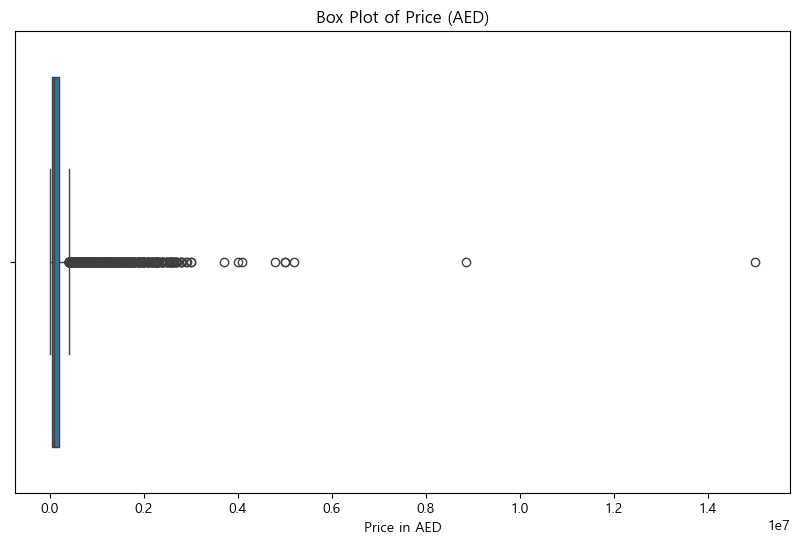

In [360]:
# 1. price_in_aed 컬럼의 사분위수 및 IQR 계산
Q1_price = df['price_in_aed'].quantile(0.25)
Q3_price = df['price_in_aed'].quantile(0.75)
IQR_price = Q3_price - Q1_price

# 2. 이상치 경계 계산
lower_bound_price = Q1_price - 1.5 * IQR_price
upper_bound_price = Q3_price + 1.5 * IQR_price

# 3. 이상치 데이터 식별
outliers_price = df[(df['price_in_aed'] < lower_bound_price) | (df['price_in_aed'] > upper_bound_price)]

print("====== price_in_aed (가격) 컬럼 이상치 분석 ======")
print(f"1사분위수 (Q1): {Q1_price}")
print(f"3사분위수 (Q3): {Q3_price}")
print(f"정상 데이터 범위: {lower_bound_price} ~ {upper_bound_price}")
print(f"이상치 개수: {len(outliers_price)}")
print("\n[이상치 데이터 샘플]")
print(outliers_price[['title', 'price_in_aed', 'year', 'company', 'model']].head())

# 4. Box Plot으로 시각화
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['price_in_aed'])
plt.title('Box Plot of Price (AED)')
plt.xlabel('Price in AED')
plt.show()

In [361]:
# 이상치가 아닌 정상 범위 데이터만 남기기
df = df[(df['price_in_aed'] >= lower_bound_price) & (df['price_in_aed'] <= upper_bound_price)]


====== kilometers (주행 거리) 컬럼 이상치 분석 ======
1사분위수 (Q1): 49224.0
3사분위수 (Q3): 145000.0
정상 데이터 범위: -94440.0 ~ 288664.0
이상치 개수: 98

[이상치 데이터 샘플]
                                                 title  kilometers    year  \
156                                   chevrolet lumina      357000  2009.0   
232                                    chevrolet tahoe     1880000  2014.0   
429       AED 1270 PM | 0% DP | 2.7L GL MT CHILLER GCC      306067  2017.0   
464  EXCELLENT DEAL for our Chevrolet Suburban 2007...      294000  2007.0   
672  TRANSIT 350 / HIGH ROOF / LWB / CARGO VAN / 3....      371537  2016.0   

       company     model  
156  chevrolet    lumina  
232  chevrolet     tahoe  
429     toyota     hiace  
464  chevrolet  suburban  
672       ford       van  


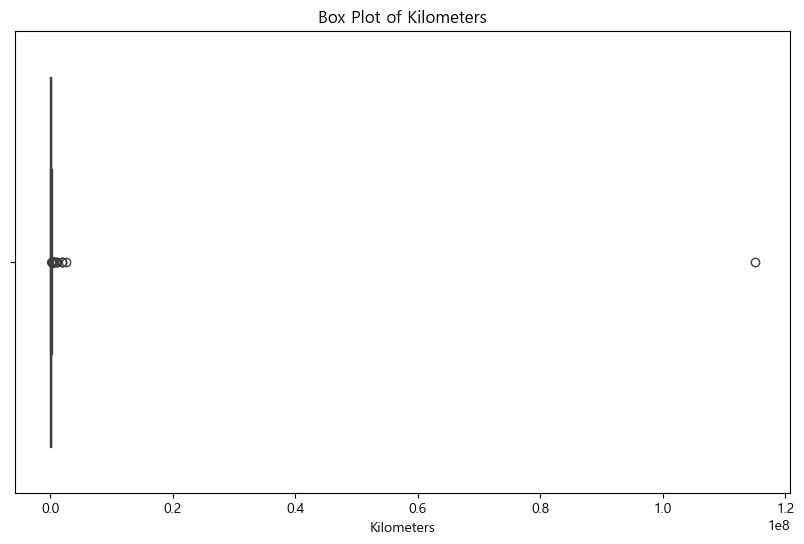

In [362]:
# 1. kilometers 컬럼의 사분위수 및 IQR 계산
Q1_km = df['kilometers'].quantile(0.25)
Q3_km = df['kilometers'].quantile(0.75)
IQR_km = Q3_km - Q1_km

# 2. 이상치 경계 계산
lower_bound_km = Q1_km - 1.5 * IQR_km
upper_bound_km = Q3_km + 1.5 * IQR_km

# 3. 이상치 데이터 식별
outliers_km = df[(df['kilometers'] < lower_bound_km) | (df['kilometers'] > upper_bound_km)]

print("\n====== kilometers (주행 거리) 컬럼 이상치 분석 ======")
print(f"1사분위수 (Q1): {Q1_km}")
print(f"3사분위수 (Q3): {Q3_km}")
print(f"정상 데이터 범위: {lower_bound_km} ~ {upper_bound_km}")
print(f"이상치 개수: {len(outliers_km)}")
print("\n[이상치 데이터 샘플]")
print(outliers_km[['title', 'kilometers', 'year', 'company', 'model']].head())

# 4. Box Plot으로 시각화
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['kilometers'])
plt.title('Box Plot of Kilometers')
plt.xlabel('Kilometers')
plt.show()

In [363]:
# 이상치가 아닌 정상 범위 데이터만 남기기
df = df[(df['kilometers'] >= lower_bound_km) & (df['kilometers'] <= upper_bound_km)]

In [364]:
# no_of_cylinders 확인
df['no_of_cylinders'].value_counts()

no_of_cylinders
6     2636
4     2505
8     1945
12      72
3       51
5       39
10      13
Name: count, dtype: int64

# Other값

In [365]:
for col in df.columns:
    count = (df[col] == 'Other').sum()
    if count > 0:
        print(f"{col}: 'Other' 값 {count}개 발견")

body_type: 'Other' 값 51개 발견
regional_specs: 'Other' 값 256개 발견
motors_trim: 'Other' 값 1314개 발견


In [366]:
# title 확인
df['title'].value_counts()

title
nissan patrol                                                                                       61
Deposit Taken, similar cars wanted, call now to sell your car                                       13
lexus ls-series                                                                                     12
mercedes-benz c-class                                                                               12
dodge charger                                                                                       12
                                                                                                    ..
MERCEDES BENZ CLS 53  FULLY LOADED                                                                   1
AED7525month | 2015 Land Rover Range Rover Autobiography 5.0L | Full Land Rove Service | Ref#871     1
LOW MILEAGE Cadillac Escalade Platinum                                                               1
Chevrolet Malibu  GCC Spec                                         

In [367]:
# date_posted 확인
df['date_posted'].value_counts()

date_posted
12/05/2022    452
13/05/2022    292
11/05/2022    285
09/05/2022    262
10/05/2022    260
             ... 
10/08/2021      1
22/08/2021      1
11/05/2021      1
07/11/2021      1
20/03/2021      1
Name: count, Length: 313, dtype: int64

### date_posted를 day, month, year로 나누고 date_posted 삭제

In [368]:
# 1. 문자열을 datetime 형식으로 변환 (형식 지정)
df['date_posted'] = pd.to_datetime(df['date_posted'], format='%d/%m/%Y')

# 2. 새로운 컬럼 생성
df['posted_day'] = df['date_posted'].dt.day
df['posted_month'] = df['date_posted'].dt.month
df['posted_year'] = df['date_posted'].dt.year

In [369]:
# 3. 기존 date_posted 컬럼 삭제
df.drop(columns=['date_posted'], inplace=True)

In [370]:
df.head()

,title,price_in_aed,kilometers,body_condition,mechanical_condition,seller_type,body_type,no_of_cylinders,transmission_type,regional_specs,...,steering_side,year,color,emirate,motors_trim,company,model,posted_day,posted_month,posted_year
1,chevrolet silverado,110000,39000,Perfect inside and out,Perfect inside and out,Dealer,SUV,8,Automatic Transmission,North American Specs,...,Left Hand Side,2018.0,White,Sharjah,1500 High Country,chevrolet,silverado,14,1,2022
2,MERCEDES-BENZ E300 - 2014 - GCC SPEC - FULL OP...,78000,200000,Perfect inside and out,Perfect inside and out,Dealer,Sedan,6,Automatic Transmission,GCC Specs,...,Left Hand Side,2014.0,Blue,Sharjah,E 300,mercedes-benz,e-class,5,5,2022
4,USED RENAULT DOKKER 2020,33000,69000,Perfect inside and out,Perfect inside and out,Owner,Wagon,4,Manual Transmission,GCC Specs,...,Left Hand Side,2020.0,White,Dubai,Standard,renault,dokker,13,5,2022
5,A7 S-line Quattro. Under Warranty. Accidents F...,98000,84000,Perfect inside and out,Perfect inside and out,Owner,Sedan,6,Automatic Transmission,GCC Specs,...,Left Hand Side,2015.0,Gold,Dubai,S-line,audi,a7,30,4,2022
9,Warranty | 0 Down payment | Model 2013 | V6 en...,35999,111749,Perfect inside and out,Perfect inside and out,Dealer,Van,6,Automatic Transmission,North American Specs,...,Left Hand Side,2013.0,Silver,Dubai,SV,nissan,quest,7,8,2021


In [371]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7261 entries, 1 to 9969
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   title                 7261 non-null   object 
 1   price_in_aed          7261 non-null   int64  
 2   kilometers            7261 non-null   int64  
 3   body_condition        7261 non-null   object 
 4   mechanical_condition  7261 non-null   object 
 5   seller_type           7261 non-null   object 
 6   body_type             7261 non-null   object 
 7   no_of_cylinders       7261 non-null   object 
 8   transmission_type     7261 non-null   object 
 9   regional_specs        7261 non-null   object 
 10  horsepower            7261 non-null   object 
 11  fuel_type             7261 non-null   object 
 12  steering_side         7261 non-null   object 
 13  year                  7261 non-null   float64
 14  color                 7261 non-null   object 
 15  emirate               7261

In [372]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7261 entries, 1 to 9969
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   title                 7261 non-null   object 
 1   price_in_aed          7261 non-null   int64  
 2   kilometers            7261 non-null   int64  
 3   body_condition        7261 non-null   object 
 4   mechanical_condition  7261 non-null   object 
 5   seller_type           7261 non-null   object 
 6   body_type             7261 non-null   object 
 7   no_of_cylinders       7261 non-null   object 
 8   transmission_type     7261 non-null   object 
 9   regional_specs        7261 non-null   object 
 10  horsepower            7261 non-null   object 
 11  fuel_type             7261 non-null   object 
 12  steering_side         7261 non-null   object 
 13  year                  7261 non-null   float64
 14  color                 7261 non-null   object 
 15  emirate               7261

In [373]:
# object 타입 컬럼명 리스트
object_col = df.select_dtypes(include='object').columns.tolist()

# 수치형 컬럼명 리스트
num_col = df.select_dtypes(include=['int64', 'float64', 'int32']).columns.tolist()

print("object_col:", object_col)
print("num_col:", num_col)

object_col: ['title', 'body_condition', 'mechanical_condition', 'seller_type', 'body_type', 'no_of_cylinders', 'transmission_type', 'regional_specs', 'horsepower', 'fuel_type', 'steering_side', 'color', 'emirate', 'motors_trim', 'company', 'model']
num_col: ['price_in_aed', 'kilometers', 'year', 'posted_day', 'posted_month', 'posted_year']


In [374]:
# 범주형 컬럼 리스트 (필요하면 직접 수정)
for col in object_col:
    print(f"===== {col} =====")
    print(df[col].value_counts(dropna=False))  # NaN도 함께 출력
    print()

===== title =====
title
nissan patrol                                                                                       61
Deposit Taken, similar cars wanted, call now to sell your car                                       13
lexus ls-series                                                                                     12
mercedes-benz c-class                                                                               12
dodge charger                                                                                       12
                                                                                                    ..
MERCEDES BENZ CLS 53  FULLY LOADED                                                                   1
AED7525month | 2015 Land Rover Range Rover Autobiography 5.0L | Full Land Rove Service | Ref#871     1
LOW MILEAGE Cadillac Escalade Platinum                                                               1
Chevrolet Malibu  GCC Spec                       

### 인코딩

In [375]:
object_col

['title',
 'body_condition',
 'mechanical_condition',
 'seller_type',
 'body_type',
 'no_of_cylinders',
 'transmission_type',
 'regional_specs',
 'horsepower',
 'fuel_type',
 'steering_side',
 'color',
 'emirate',
 'motors_trim',
 'company',
 'model']

In [376]:
cols_to_encode = [
    'body_condition',
    'mechanical_condition',
    'seller_type',
    'body_type',
    'no_of_cylinders',
    'transmission_type',
    'regional_specs',
    'horsepower',
    'fuel_type',
    'steering_side',
    'color',
    'emirate'
]

for col in cols_to_encode:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [377]:
# company 레이블 인코딩
le = LabelEncoder()
df['company'] = le.fit_transform(df['company'])

In [378]:
# 'motors_trim', 'model' 인코딩
def rare_category_encoding(df, col, threshold=0.01):
    freq = df[col].value_counts(normalize=True)
    rare_vals = freq[freq < threshold].index
    df[col] = df[col].replace(rare_vals, 'Other')
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    return df

# motors_trim 처리
df = rare_category_encoding(df, 'motors_trim', threshold=0.01)

# model 처리
df = rare_category_encoding(df, 'model', threshold=0.01)

### 쓸모없어 피처 삭제 및 새로운 피처 생성

In [379]:
# title 피처 삭제.
df.drop(columns=['title'], inplace=True)

In [380]:
# period 피처 생성
df['period'] = (df['posted_year'] - df['year']).astype(int)

In [385]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7261 entries, 1 to 9969
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   price_in_aed          7261 non-null   int64  
 1   kilometers            7261 non-null   int64  
 2   body_condition        7261 non-null   int64  
 3   mechanical_condition  7261 non-null   int64  
 4   seller_type           7261 non-null   int64  
 5   body_type             7261 non-null   int64  
 6   no_of_cylinders       7261 non-null   int64  
 7   transmission_type     7261 non-null   int64  
 8   regional_specs        7261 non-null   int64  
 9   horsepower            7261 non-null   int64  
 10  fuel_type             7261 non-null   int64  
 11  steering_side         7261 non-null   int64  
 12  year                  7261 non-null   float64
 13  color                 7261 non-null   int64  
 14  emirate               7261 non-null   int64  
 15  motors_trim           7261

In [382]:
df['model'].value_counts()

model
2     4927
13     332
16     173
4      167
15     161
7      152
12     138
14     131
6      123
1      108
5      107
9      107
11     105
8       93
18      92
17      91
10      88
0       85
3       81
Name: count, dtype: int64

# 탐색적 데이터 분석(EDA)

In [383]:
new_col = df.columns.tolist() # df.columns
new_col

['price_in_aed',
 'kilometers',
 'body_condition',
 'mechanical_condition',
 'seller_type',
 'body_type',
 'no_of_cylinders',
 'transmission_type',
 'regional_specs',
 'horsepower',
 'fuel_type',
 'steering_side',
 'year',
 'color',
 'emirate',
 'motors_trim',
 'company',
 'model',
 'posted_day',
 'posted_month',
 'posted_year',
 'period']

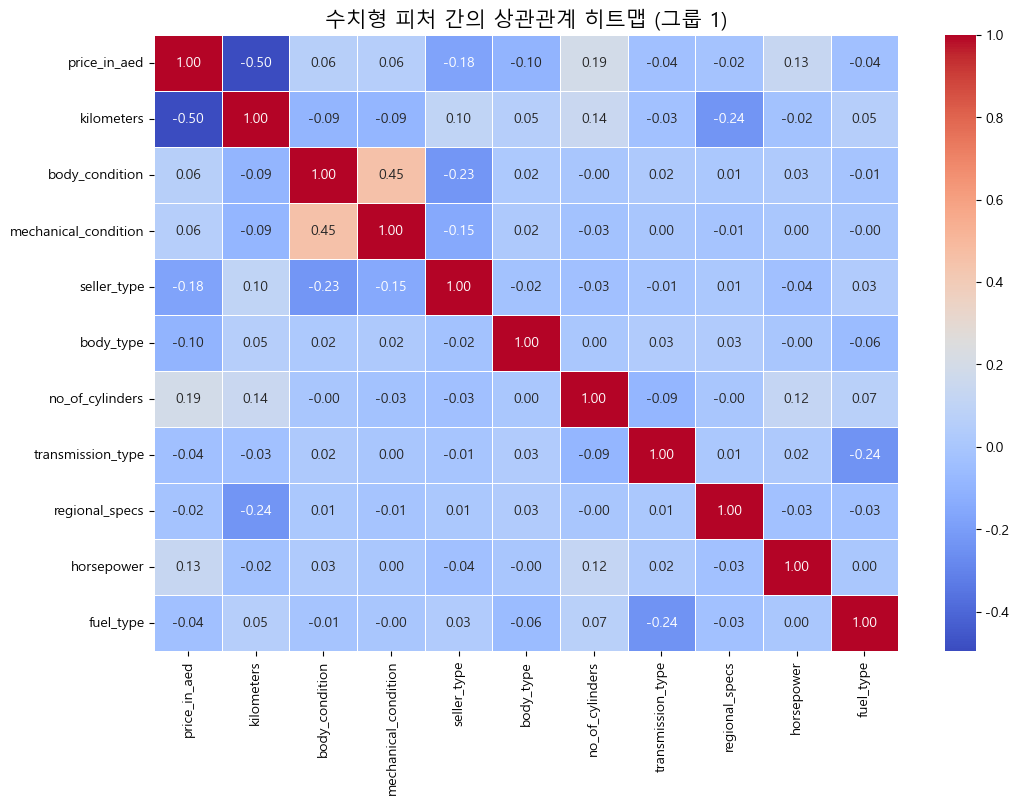

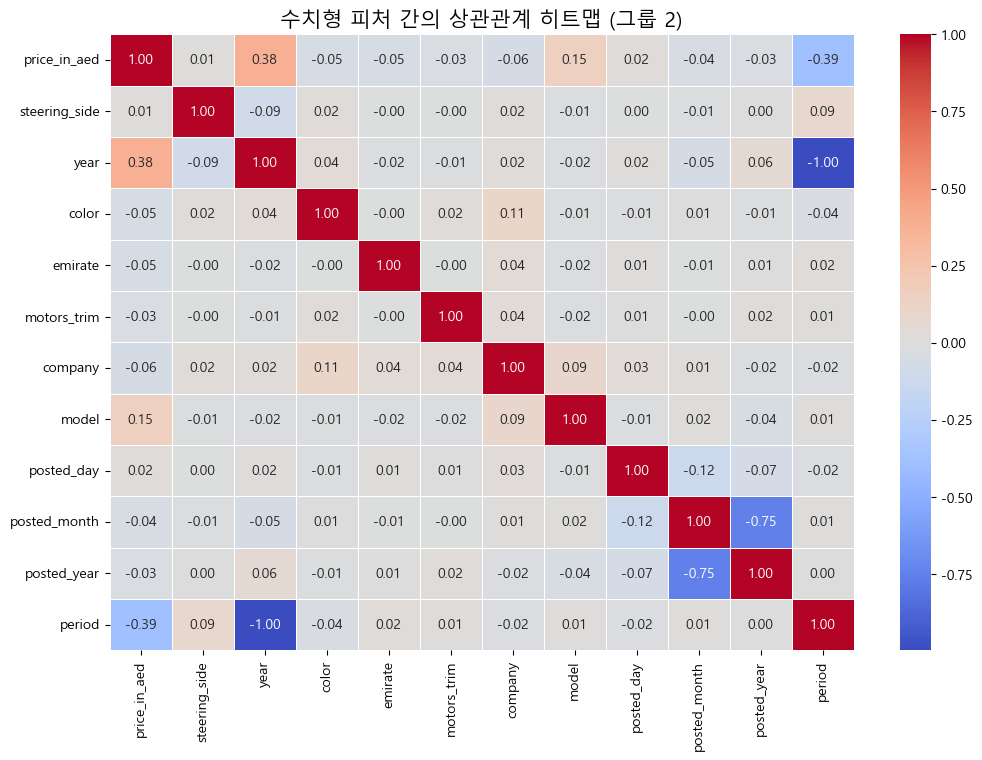

In [388]:
# 한글 폰트 설정 및 마이너스 부호 깨짐 방지
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

num_col_1 = [
    'price_in_aed', 'kilometers', 'body_condition', 'mechanical_condition',
    'seller_type', 'body_type', 'no_of_cylinders', 'transmission_type',
    'regional_specs', 'horsepower', 'fuel_type']

num_col_2 = [
    'price_in_aed', 'steering_side', 'year',
    'color', 'emirate', 'motors_trim', 'company', 'model',
    'posted_day', 'posted_month', 'posted_year', 'period']

# 첫 번째 그룹 상관계수 및 히트맵
df_numeric_1 = df[num_col_1]
corr_matrix_1 = df_numeric_1.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix_1, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('수치형 피처 간의 상관관계 히트맵 (그룹 1)', size=15)
plt.show()

# 두 번째 그룹 상관계수 및 히트맵
df_numeric_2 = df[num_col_2]
corr_matrix_2 = df_numeric_2.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix_2, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('수치형 피처 간의 상관관계 히트맵 (그룹 2)', size=15)
plt.show()

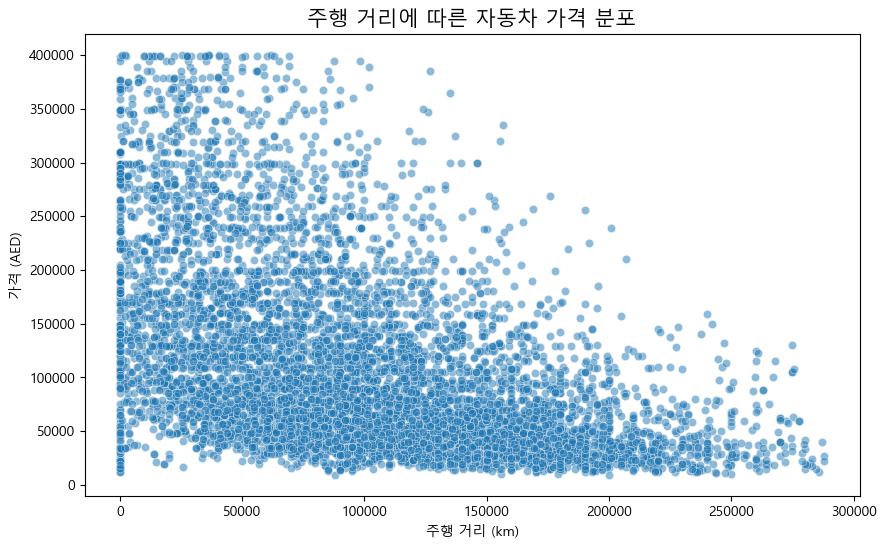

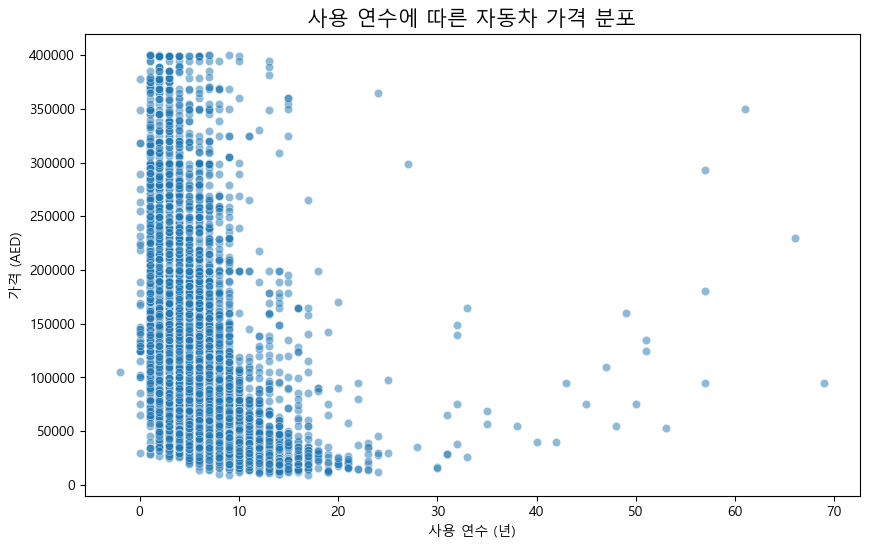

In [389]:
# 가격과 주행 거리의 관계 시각화
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='kilometers', y='price_in_aed', alpha=0.5)
plt.title('주행 거리에 따른 자동차 가격 분포', size=15)
plt.xlabel('주행 거리 (km)')
plt.ylabel('가격 (AED)')
plt.ticklabel_format(style='plain', axis='x') # x축 지수 표기법 비활성화
plt.show()

# 가격과 사용 연수의 관계 시각화
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='period', y='price_in_aed', alpha=0.5)
plt.title('사용 연수에 따른 자동차 가격 분포', size=15)
plt.xlabel('사용 연수 (년)')
plt.ylabel('가격 (AED)')
plt.show()

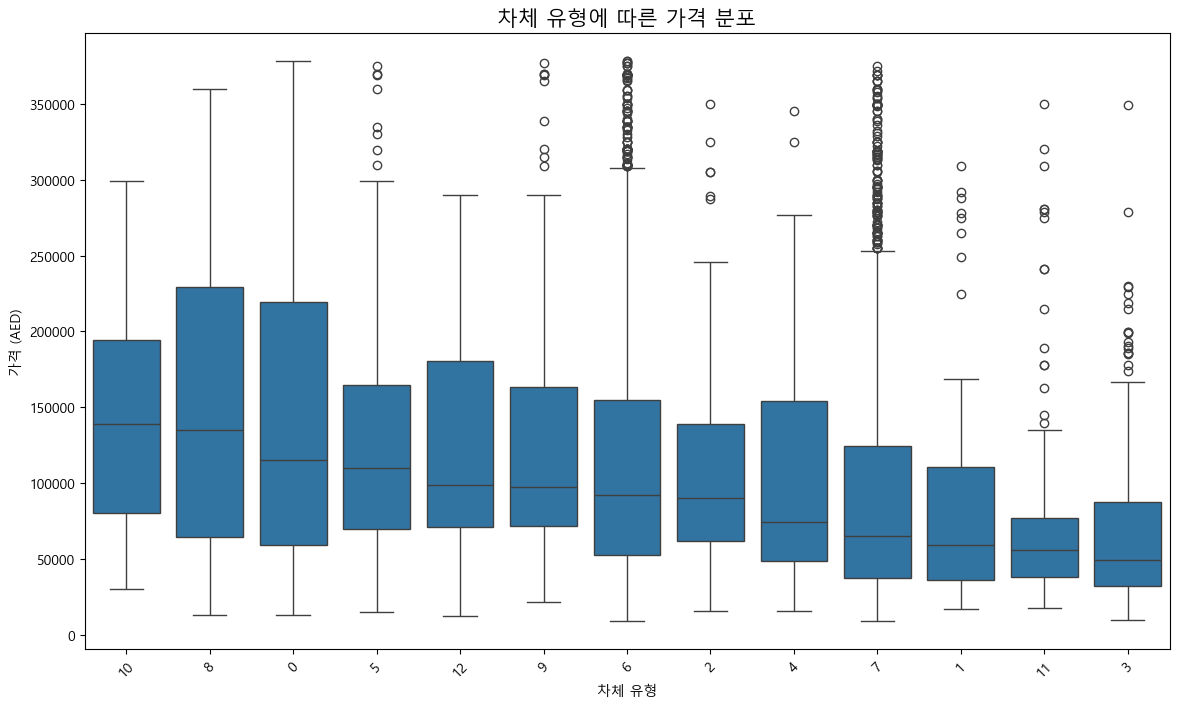

In [390]:
# 가격이 매우 높은 일부 차량 때문에 그래프가 왜곡될 수 있어, 상위 1% 데이터를 제외하고 시각화합니다.
price_cap = df['price_in_aed'].quantile(0.99)
df_filtered = df[df['price_in_aed'] < price_cap]

# 차체 유형별 가격 분포 박스 플롯
plt.figure(figsize=(14, 8))
sns.boxplot(data=df_filtered, x='body_type', y='price_in_aed', order=df_filtered.groupby('body_type')['price_in_aed'].median().sort_values(ascending=False).index)
plt.title('차체 유형에 따른 가격 분포', size=15)
plt.xlabel('차체 유형')
plt.ylabel('가격 (AED)')
plt.xticks(rotation=45)
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_1344\3314936987.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_top_companies, x='company', y='price_in_aed', order=company_order, ci=None) # ci=None은 신뢰구간 미표시


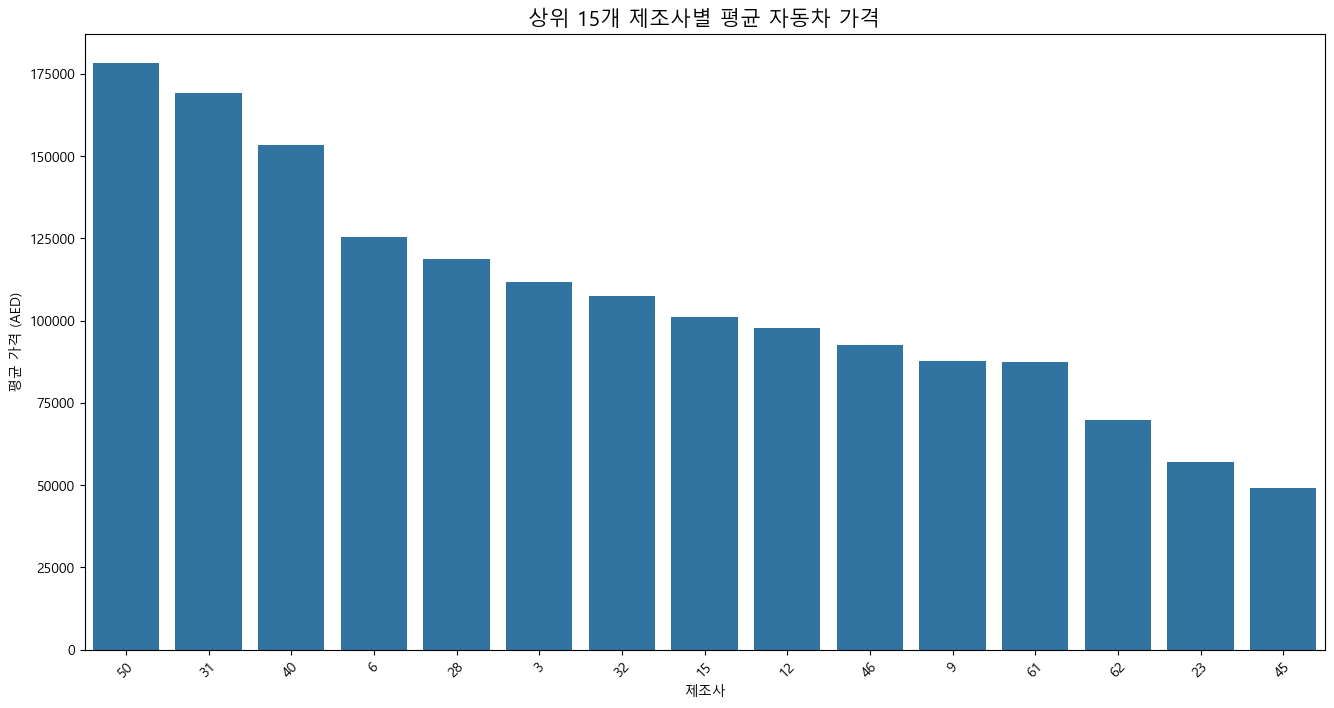

In [393]:
# 매물 수가 많은 상위 15개 제조사 선정
top_15_companies = df['company'].value_counts().nlargest(15).index
df_top_companies = df[df['company'].isin(top_15_companies)]

# 제조사별 평균 가격 계산 및 정렬
company_order = df_top_companies.groupby('company')['price_in_aed'].mean().sort_values(ascending=False).index

# 제조사별 평균 가격 막대 그래프
plt.figure(figsize=(16, 8))
sns.barplot(data=df_top_companies, x='company', y='price_in_aed', order=company_order, ci=None) # ci=None은 신뢰구간 미표시
plt.title('상위 15개 제조사별 평균 자동차 가격', size=15)
plt.xlabel('제조사')
plt.ylabel('평균 가격 (AED)')
plt.xticks(rotation=45)
plt.show()

In [394]:
# LabelEncoder 객체가 le라고 가정할 때
print("인코딩된 숫자 : 원본 값")
for code, original in enumerate(le.classes_):
    print(f"{code} : {original}")

인코딩된 숫자 : 원본 값
0 : acura
1 : alfa-romeo
2 : aston-martin
3 : audi
4 : baic
5 : bentley
6 : bmw
7 : cadillac
8 : changan
9 : chevrolet
10 : chrysler
11 : daihatsu
12 : dodge
13 : ferrari
14 : fiat
15 : ford
16 : foton
17 : gac
18 : geely
19 : genesis
20 : gmc
21 : honda
22 : hummer
23 : hyundai
24 : infiniti
25 : isuzu
26 : jac
27 : jaguar
28 : jeep
29 : kia
30 : lamborghini
31 : land-rover
32 : lexus
33 : lincoln
34 : lotus
35 : maserati
36 : maxus
37 : maybach
38 : mazda
39 : mclaren
40 : mercedes-benz
41 : mercedes-maybach
42 : mercury
43 : mg
44 : mini
45 : mitsubishi
46 : nissan
47 : opel
48 : other-make
49 : peugeot
50 : porsche
51 : renault
52 : rolls-royce
53 : rover
54 : saab
55 : skoda
56 : smart
57 : ssang-yong
58 : subaru
59 : suzuki
60 : tesla
61 : toyota
62 : volkswagen
63 : volvo
64 : westfield-sportscars


**결과 해석**:    
'ferrari', 'rolls-royce'와 같은 럭셔리 브랜드가 상위에 위치하고, 'toyota', 'nissan'과 같은   대중적인 브랜드가 상대적으로 낮은 평균 가격을 보일 것입니다.   
이를 통해 브랜드가 가격에 미치는 영향을 직관적으로 이해할 수 있습니다.

# 데이터 전처리

# 모델 생성 및 평가

In [395]:
# 1. 피처(X)와 타겟(y) 분리
X = df.drop('price_in_aed', axis=1)
y = df['price_in_aed']

In [396]:
# 2. 수치형/범주형 컬럼 식별
# horsepower는 전처리가 필요하므로 우선 제외하고, 나중에 추가적인 전처리를 통해 포함시킬 수 있습니다.
numerical_features = X.select_dtypes(include=np.number).columns.tolist()
categorical_features = X.select_dtypes(exclude=np.number).columns.tolist()

In [397]:
# 'horsepower'는 별도 처리가 필요하므로 일단 제외
if 'horsepower' in categorical_features:
    categorical_features.remove('horsepower')

In [398]:
print(f"수치형 피처: {numerical_features}")
print(f"범주형 피처: {categorical_features}")

수치형 피처: ['kilometers', 'body_condition', 'mechanical_condition', 'seller_type', 'body_type', 'no_of_cylinders', 'transmission_type', 'regional_specs', 'horsepower', 'fuel_type', 'steering_side', 'year', 'color', 'emirate', 'motors_trim', 'company', 'model', 'posted_day', 'posted_month', 'posted_year', 'period']
범주형 피처: []


In [401]:
# 3. 데이터 전처리 파이프라인 구축
# 수치형 데이터 전처리: 결측치는 중앙값으로 대체하고, StandardScaler로 스케일링
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

In [405]:
# 범주형 데이터 전처리: 결측치는 최빈값으로 대체하고, OneHotEncoder로 변환
# handle_unknown='ignore'는 테스트 데이터에 처음 보는 카테고리가 나와도 에러를 발생시키지 않음
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# ColumnTransformer를 사용하여 수치형/범주형 데이터에 각각 다른 전처리 적용
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough' # 처리되지 않은 나머지 컬럼은 그대로 둠
)

In [402]:
# 4. 학습용/테스트용 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [403]:
# --- 모델 학습 및 평가 ---

# 5. 모델 정의
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}

# 모델 성능 해석 및 최종 모델 선택

'Random Forest' 모델 학습 중...
'Random Forest' 모델 평가 완료.

'Gradient Boosting' 모델 학습 중...
'Gradient Boosting' 모델 평가 완료.

'XGBoost' 모델 학습 중...
'XGBoost' 모델 평가 완료.

'LightGBM' 모델 학습 중...
'LightGBM' 모델 평가 완료.

===== 모델별 성능 평가 결과 =====
                            MAE           MSE          RMSE        R²
Random Forest      26182.962579  1.755907e+09  41903.539530  0.780525
Gradient Boosting  29026.436625  1.796571e+09  42385.973864  0.775443
XGBoost            22384.283140  1.246123e+09  35300.468978  0.844244
LightGBM           22906.024416  1.309015e+09  36180.310268  0.836383


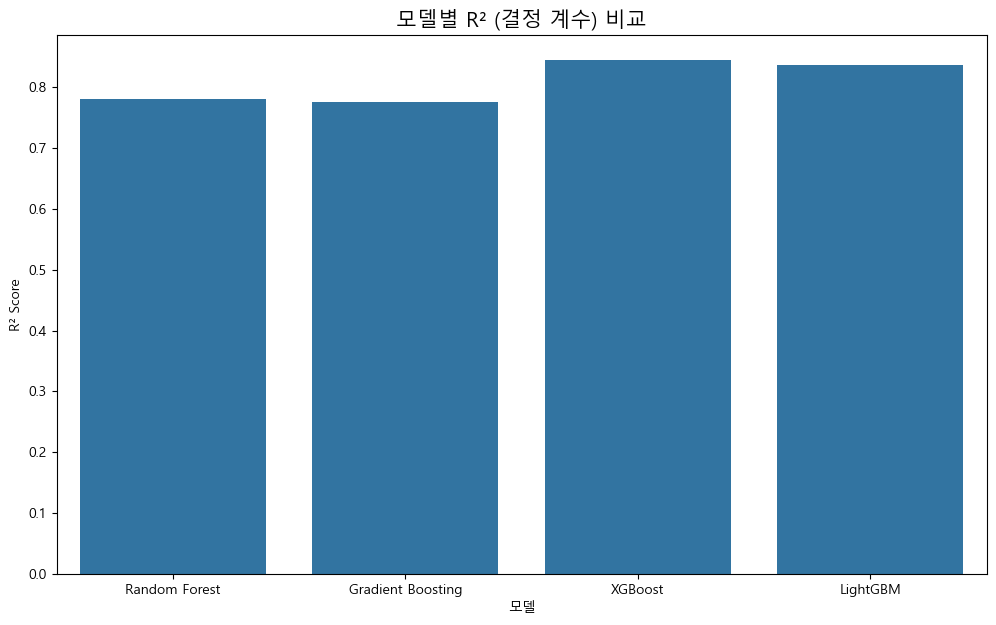

In [429]:
# 결과를 저장할 딕셔너리
results = {}

for name, model in models.items():
    # 전처리기와 모델을 파이프라인으로 연결
    model_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                     ('regressor', model)])

    # 모델 학습
    print(f"'{name}' 모델 학습 중...")
    model_pipeline.fit(X_train, y_train)

    # 예측
    y_pred = model_pipeline.predict(X_test)

    # 성능 평가
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # 결과 저장
    results[name] = [mae, mse, rmse, r2]
    print(f"'{name}' 모델 평가 완료.\n")


# --- 결과 확인 ---

# 6. 성능 평가 결과 출력
results_df = pd.DataFrame(results, index=['MAE', 'MSE', 'RMSE', 'R²']).T
print("===== 모델별 성능 평가 결과 =====")
print(results_df)

# 7. R² 점수 시각화
plt.figure(figsize=(12, 7))
sns.barplot(x=results_df.index, y=results_df['R²'])
plt.title('모델별 R² (결정 계수) 비교', size=15)
plt.xlabel('모델')
plt.ylabel('R² Score')
plt.show()

'Random Forest' 모델 교차 검증 시작...
'Random Forest' 모델 교차 검증 완료.

'Gradient Boosting' 모델 교차 검증 시작...
'Gradient Boosting' 모델 교차 검증 완료.

'XGBoost' 모델 교차 검증 시작...
'XGBoost' 모델 교차 검증 완료.

'LightGBM' 모델 교차 검증 시작...
'LightGBM' 모델 교차 검증 완료.

===== 모델별 교차 검증 성능 평가 결과 =====
                    R² Mean    R² Std     RMSE Mean     RMSE Std
LightGBM           0.855103  0.006474  32804.511297   499.902934
XGBoost            0.853923  0.011473  32906.316225   715.523056
Random Forest      0.797635  0.014617  38750.569406  1200.719539
Gradient Boosting  0.788785  0.012048  39594.424716   674.550323


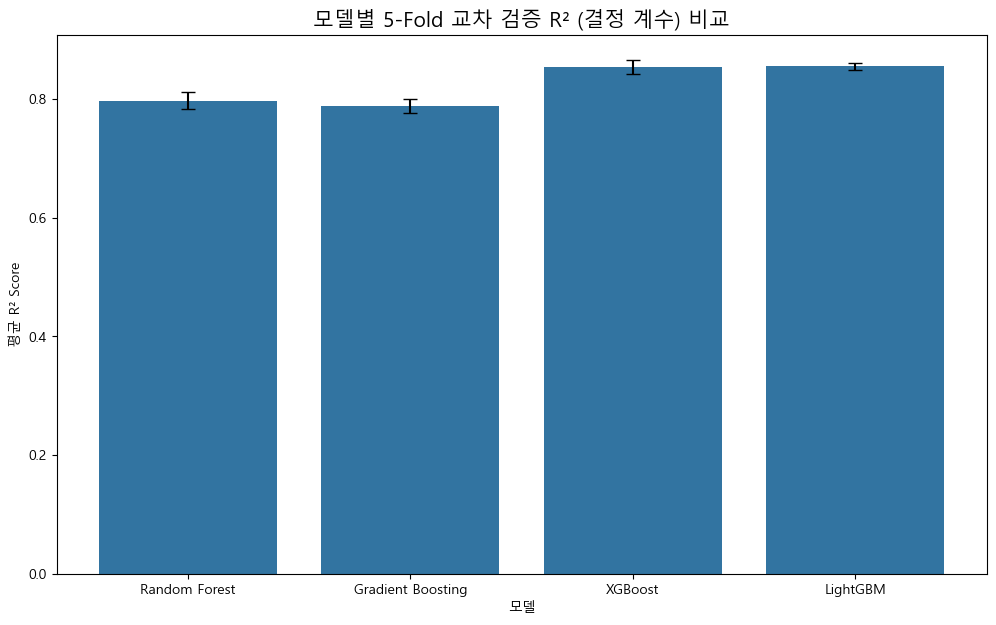

In [428]:
# 피처(X)와 타겟(y) 분리
X = df.drop('price_in_aed', axis=1)
y = df['price_in_aed']

# 수치형/범주형 컬럼 식별
numerical_features = X.select_dtypes(include=np.number).columns.tolist()
categorical_features = X.select_dtypes(exclude=np.number).columns.tolist()

if 'horsepower' in categorical_features:
    categorical_features.remove('horsepower')

# 데이터 전처리 파이프라인 구축
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False)) # sparse_output=False 추가
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough'
)

# --- 2. 교차 검증을 통한 모델 학습 및 평가 ---

# 평가할 모델 목록 정의
models = {
    'Random Forest': RandomForestRegressor(random_state=42, n_jobs=-1),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42, n_jobs=-1),
    'LightGBM': LGBMRegressor(random_state=42, n_jobs=-1),
}

# 교차 검증 결과를 저장할 딕셔너리
cv_results = {}

# K-폴드 교차 검증 수행 (K=5)
for name, model in models.items():
    print(f"'{name}' 모델 교차 검증 시작...")
    
    # 전처리기와 모델을 파이프라인으로 연결
    model_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                     ('regressor', model)])
    
    # cross_val_score를 사용하여 R² 점수 계산
    # scikit-learn의 점수(score)는 높을수록 좋기 때문에, MSE/RMSE 같은 '오차'는 음수로 변환하여 계산합니다.
    r2_scores = cross_val_score(model_pipeline, X, y, cv=5, scoring='r2', n_jobs=-1)
    neg_mse_scores = cross_val_score(model_pipeline, X, y, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    
    # MSE를 양수로 변환하고 RMSE 계산
    rmse_scores = np.sqrt(-neg_mse_scores)
    
    # 결과 저장
    cv_results[name] = {
        'R² Mean': r2_scores.mean(),
        'R² Std': r2_scores.std(),
        'RMSE Mean': rmse_scores.mean(),
        'RMSE Std': rmse_scores.std()
    }
    print(f"'{name}' 모델 교차 검증 완료.\n")

# --- 3. 결과 확인 ---

# 교차 검증 결과 데이터프레임으로 변환
cv_results_df = pd.DataFrame(cv_results).T
print("===== 모델별 교차 검증 성능 평가 결과 =====")
print(cv_results_df.sort_values(by='R² Mean', ascending=False))

# R² 점수 시각화
plt.figure(figsize=(12, 7))
sns.barplot(x=cv_results_df.index, y=cv_results_df['R² Mean'])
plt.errorbar(x=cv_results_df.index, y=cv_results_df['R² Mean'], yerr=cv_results_df['R² Std'], fmt='none', c='black', capsize=5)
plt.title('모델별 5-Fold 교차 검증 R² (결정 계수) 비교', size=15)
plt.xlabel('모델')
plt.ylabel('평균 R² Score')
plt.show()

---